#### Importaciones

In [50]:
import pandas as pd
import numpy as np
import time
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importar modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

#### Carga de datos 

In [51]:
df = pd.read_csv('train_limpio.csv')

#### Rellenar los nulos de la columna "Retraso en la llegada en minutos"

In [52]:
# Primero se detecta si hay huecos vacios, valores nulos en la columna: 'Retraso en la llegada en minutos'
if df['Retraso en la llegada en minutos'].isnull().sum() > 0:

# Rellenar nulos en 'Retraso en la llegada en minutos' con la media sacada de los demas registros (para que no haya valores nulos)
    df['Retraso en la llegada en minutos'] = df['Retraso en la llegada en minutos'].fillna(df['Retraso en la llegada en minutos'].mean())

#### Establecer la y= target 
#### Dividir en Train y Test 

In [53]:
# Establecer la y= target ; X= variables
X = df.drop(columns= ['Satisfacción'])
y = df['Satisfacción']

In [54]:
# Dividir en Train y Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Escalar los datos

In [55]:
# Escalar los datos (StandardScaler)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape", X_train_scaled.shape)
print("Test shape", X_test_scaled.shape)

Train shape (83123, 19)
Test shape (20781, 19)


## Modelos

### Logistic Regression

In [56]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8601126028583802
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11713
           1       0.85      0.83      0.84      9068

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



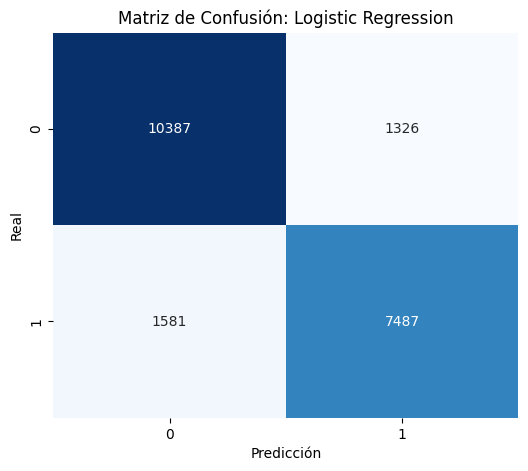

In [57]:
# Generar matriz
cm = confusion_matrix(y_test, y_pred_lr)

# Graficar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión: Logistic Regression')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#### Decision Tree (Árbol de Decisión)

In [58]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train) 

y_pred_dt = model_dt.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Accuracy: 0.9371541311775179


#### Random Forest

In [59]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9572205379914345


#### Gradient Boosting

In [64]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Accuracy: 0.9337856696020403


#### KNN (K-Nearest Neighbors)

In [65]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.9231990760791108


#### SVC (Support Vector Classifier)

In [66]:
# Usamos probability=True para poder ver porcentajes de confianza luego
model_svc = SVC(probability=True, random_state=42)

# IMPORTANTE: Entrenamos solo con 10,000 muestras para ahorrar tiempo
model_svc.fit(X_train_scaled[:10000], y_train[:10000])

y_pred_svc = model_svc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

Accuracy: 0.9352774168711804


#### KMeans (Clustering - No Supervisado)

In [68]:
model_kmeans = KMeans(n_clusters=2, random_state=42)
model_kmeans.fit(X_train_scaled)

y_pred_kmeans = model_kmeans.predict(X_test_scaled)

# Como KMeans asigna 0 y 1 aleatoriamente a los grupos,
# comprobamos si hay que invertir los resultados para que coincidan con nuestras etiquetas
acc = accuracy_score(y_test, y_pred_kmeans)
if acc < 0.5:
    y_pred_kmeans = 1 - y_pred_kmeans # Invertir 0s y 1s
    acc = accuracy_score(y_test, y_pred_kmeans)

print("Accuracy estimada:", acc)

Accuracy estimada: 0.7627640633270776


In [69]:
# Elegimos el mejor modelo según resultados (Random Forest)
mejor_modelo = model_rf 


# Guardar el modelo entrenado
with open('mejor_modelo.pkl', 'wb') as f:
    pickle.dump(mejor_modelo, f)

# IMPORTANTE: Guardar también el escalador (scaler)
# Si no escalas los datos nuevos igual que los de entrenamiento, el modelo fallará.
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)